In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.linear_model import LogisticRegression
#import 

In [2]:
data=pd.read_excel('data/data1.xlsx')
for i in range(2,48):
    d=pd.read_excel('data/data'+str(i)+'.xlsx')
    data=pd.concat([data,d],axis=0,ignore_index=True)

In [3]:
data.head()

,Name,Comment,Label
0,মোহাম্মদ সোহেল রানা,খেললো কানাডাজিতলো লেংড়াডা,3.0
1,Preetom Mazumder,"Like I said, World Cup of Goalkeepers",NaN
2,Mizanur Rahman Rupok,Well played Canada 🇨🇦🇨🇦🇨🇦 bed luck..,NaN
3,Mohammed Ahmad,"৫০ধাপ নিচের দল থেকে হারের পর ও যারা চেঁচায়, তা...",3.0
4,Tarek Aziz,কানাডার ভাগ্য খারাপ না হয় বেলজিয়ামের খারাপ খবর...,2.0


# Preprocessing

In [4]:
#drop the rows with Label==nan
data.dropna(subset=['Label'],inplace=True)

In [5]:
from bangla_stemmer.stemmer import stemmer
# Data cleaning function
def process_comments(Comment): 
    Comment = re.sub('[^\u0980-\u09FF]',' ',str(Comment)) #removing unnecessary punctuation
    stmr = stemmer.BanglaStemmer()
    stm = stmr.stem(Comment.split())
    ss = ' '.join(stm)
    return ss


     

In [6]:
# Apply the function into the dataframe
data['cleaned'] = data['Comment'].apply(process_comments)  

applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
appli

In [7]:
data.head(17)

,Name,Comment,Label,cleaned
0,মোহাম্মদ সোহেল রানা,খেললো কানাডাজিতলো লেংড়াডা,3.0,খেললো কানাডাজিতলো লেংড়াডা
3,Mohammed Ahmad,"৫০ধাপ নিচের দল থেকে হারের পর ও যারা চেঁচায়, তা...",3.0,৫০ধাপ নিচ দল থেক হার পর ও যার চেঁচায় তার পৃথিব...
4,Tarek Aziz,কানাডার ভাগ্য খারাপ না হয় বেলজিয়ামের খারাপ খবর...,2.0,কানা ভাগ্য খারাপ না হয় বেলজিয়াম খারাপ খবর ছিল ...
5,Parvej Sheikh,তবে খেলা ভালো হয়েছে।।,2.0,তবে খেলা ভালো হয়
6,এইচ আর আবির,অভিনন্দন প্রিয় বেলজিয়াম 🇧🇪❤️তবে আরো ভালো খেল...,2.0,অভিনন্দন প্রিয় বেলজিয়াম তবে আরো ভালো খেলা আশ...
7,Faysal Ahamed,ভালো খেললেই জিতা জায় না এটা তার প্রমান 😂,2.0,ভালো খেললে জিতা জায় না এটা তার প্রমান
8,Md Kamruzzaman,যদিও ১-০ গোলে হারছে। তবুও এই কানাডা দূর্দান্ত ...,2.0,যদি ১ ০ গোলে হার তবু এই কানাডা দূর্দান্ত এর সে...
9,Mia Ashik,২০১৮ সালের বেলজিয়ামকে খুঁজে পাচ্ছি না 🇧🇪😪বেলজি...,2.0,২০১৮ সাল বেলজিয়াম খুঁজে পাচ্ না বেলজিয়াম কিভাব...
10,Zahadul Islam Parvez,বর্তমান সময়ের বিশ্বের অন্যতম সেরা গোলরক্ষক কর্...,1.0,বর্তমান সময় বিশ্ব অন্যতম সের গোলরক্ষক কর্তুয়া
12,M Russell Islam Raz,একটা ভালো ফিনিশারের অভাবে এত ভালো খেলেও শেষ পর...,2.0,এক ভালো ফিনিশার অভাবে এত ভালো খাল শেষ পর্যন্ত ...


In [8]:
#length of the comments
data['length'] = data['cleaned'].apply(lambda x: len(x.split()))

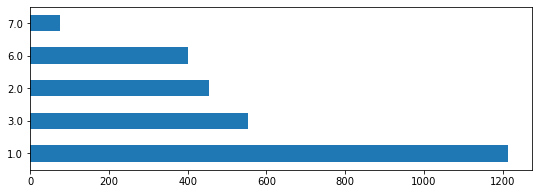

In [9]:
#drop the rows with length==0
data.drop(data[data['length']==0].index,inplace=True)
#drop the name column
data.drop('Name',axis=1,inplace=True)
#change the label 4,5 to 1
data['Label'].replace({4:1,5:1},inplace=True)
data['Label'].value_counts().plot(kind='barh', figsize=(9, 3))
# shuffle the data
data = data.sample(frac=1).reset_index(drop=True)
#drop irrelevant comments
#drop the rows with Label==7 and reset the index
data.drop(data[data['Label']==7].index,inplace=True)


In [10]:
#value count of the labels
data['Label'].value_counts()

1.0    1215
3.0     554
2.0     454
6.0     401
Name: Label, dtype: int64

In [11]:
data.head(17)

,Comment,Label,cleaned,length
0,"কথা ঠিক, কেন VAR ব্যবহার করা হলো না?মার্কিন রে...",2.0,কথা ঠিক কেন ব্যবহ কর হলো না মার্কিন রেফারির ষড়...,10
1,পৃথিবীর আর কোন বিশ্ববিদ্যালয়ে এসব নাইএই দিক হি...,1.0,পৃথিবীর আর কোন বিশ্ববিদ্যালয় এসব নাইএই দিক হিস...,11
3,"নেদারল্যান্ড ৩,,০ আর্জেন্টিনা",1.0,নেদারল্যান্ড ৩ ০ আর্জেন্টিনা,4
4,"ওকে ভাই, তখন আমরা তাকে স্যার ডাকবো।",6.0,ওকে ভাই তখন আম তাক স্য ডাকবো,7
5,এরা এবার খেলতে আসেনি এসেছে পুট্কিকামীদের পক্ষে...,3.0,এর এব খেল আসেনি এস পুট্কিকামী পক্ষে রাজনীতি কর,9
6,"অযাচিত প্রস্তান,,,, সব জয় সুখের হয় না ❤️❤️❤️",3.0,অযাচিত প্রস্তান সব জয় সুখ হয় না,7
7,মন খারাপ -তবে এই নিউজে কোথাও একটু স্বস্তি মিলল...,1.0,মন খারাপ তবে এই নিউজে কোথা একটু স্বস্তি মিলল প...,17
8,মেসি ছাড়া পুরো পিএসজি অচল,2.0,মেসি ছাড়া পুরো পিএসজি অচল,5
9,আর্জেন্টিনার দৌড় সুপার এইট পর্যন্ত।,1.0,আর্জেন্টিন দৌড় সুপ এইট পর্যন্ত,5
10,মেসির বিরোধী দলের কেউ তাকে উসকানি দিচ্ছে,1.0,মেসির বিরোধী দল কেউ তাক উসকানি দেয়,7


# split dataset

In [12]:
#split the data into train and test
X=data['cleaned']
y=data['Label']
#train size 80% and test size 20%
X_train = X[:int(len(X)*0.8)]
X_test = X[int(len(X)*0.8):]
y_train = y[:int(len(y)*0.8)]
y_test = y[int(len(y)*0.8):]

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

#tfidf vectorizer
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [13]:
X_test_copy.head()

2159                                এব সহ ১৭ বার
2160                                        হাহা
2161                             আল্লাহ মাফ করুক
2162    সত্যি আপনি ফুটবল খেল আকর্ষণ এবং সৌন্দর্য
2163                              চোর মার বড় গলা
Name: cleaned, dtype: object

In [14]:
#logistic regression
logreg = LogisticRegression()
logreg.fit(X_train_tfidf, y_train)
y_pred = logreg.predict(X_test_tfidf)
print('Accuracy: ',accuracy_score(y_test, y_pred))

#run the model on train set
y_pred_train = logreg.predict(X_train_tfidf)
print('Accuracy: ',accuracy_score(y_train, y_pred_train))

Accuracy:  0.5009523809523809
Accuracy:  0.6617436874702239


In [15]:
misclassified = 0
for i in range(0,len(y_pred)):
    #print only the misclassified comments
    if y_pred[i]!=y_test.iloc[i]:
        print('Actual label: ',y_test.iloc[i])
        print('Predicted label: ',y_pred[i])
        print('Comment: ',X_test_copy.iloc[i])
        misclassified+=1
  
    

Actual label:  3.0
Predicted label:  1.0
Comment:  থাক ছোট মানুষ
Actual label:  2.0
Predicted label:  1.0
Comment:  যে মেসির সমালোচনা করে সে ফুটবল কিছু বোঝেনা
Actual label:  3.0
Predicted label:  1.0
Comment:  টিম যে চোর দল এটা বিশ্ববাসী ভালো করে জানে চোরান্টিনা
Actual label:  2.0
Predicted label:  1.0
Comment:  এটা অঘটন নয় নিঃসন্দেহ সৌদি আর ভাল খাল জিত বিশেষ করে সেকেন্ড হাফে খুব পরিকল্পিত খেলা খাল
Actual label:  6.0
Predicted label:  2.0
Comment:  আর্জেন্টিন বাজ পাখি কোথায় গেল মনে হয় আকাশে উড় গিয়ে বল ধর ভুলে গেছ
Actual label:  1.0
Predicted label:  2.0
Comment:  এরকম ও হয় ওদের এর সময়
Actual label:  3.0
Predicted label:  1.0
Comment:  কিছু কিছু সময় গ্রিহপালিত সংবাদিক কাজ না থাকলে যা হয়
Actual label:  6.0
Predicted label:  1.0
Comment:  এই এক টিম যার ১৮ সাল বিশ্বকাপে হারা পর থেক সবকিছুতে কাতা বিশ্বকাপ জয় গন্ধ পাচ্ছেআর কত গন্ধ নিবা রে ভাই
Actual label:  6.0
Predicted label:  1.0
Comment:  অভিনয় কর হলে এই কোনো বিকল্প নেই
Actual label:  2.0
Predicted label:  1.0
Comment:  এটা কোনভাবে অঘটন

In [16]:
print('Total misclassified comments: ',misclassified)

Total misclassified comments:  262


In [17]:
logreg.predict(tfidf.transform(['বউ']))

array([3.])

In [18]:
print(X.shape)
print(X_train_copy.shape)
print(X_test_copy.shape)
print(len(y_pred))  

(2624,)
(2099,)
(525,)
525


In [19]:
#ensemble using bagging classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(LogisticRegression(), max_samples=0.5, max_features=0.5)
bagging.fit(X_train_tfidf, y_train)
y_pred = bagging.predict(X_test_tfidf)
print('Accuracy: ',accuracy_score(y_test, y_pred))

Accuracy:  0.49333333333333335


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [21]:
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
naive_bayes = MultinomialNB()
knn = KNeighborsClassifier()
svm = SVC()
sgd = SGDClassifier()

In [22]:
#fit the models
decision_tree.fit(X_train_tfidf, y_train)
random_forest.fit(X_train_tfidf, y_train)
naive_bayes.fit(X_train_tfidf, y_train)
knn.fit(X_train_tfidf, y_train)
svm.fit(X_train_tfidf, y_train)
sgd.fit(X_train_tfidf, y_train)

SGDClassifier()

In [23]:
#predict the models
y_pred_decision_tree = decision_tree.predict(X_test_tfidf)
print('Accuracy: ',accuracy_score(y_test, y_pred_decision_tree))

Accuracy:  0.4552380952380952


In [24]:
y_pred_random_forest = random_forest.predict(X_test_tfidf)
print('Accuracy: ',accuracy_score(y_test, y_pred_random_forest))

Accuracy:  0.5238095238095238


In [25]:
y_pred_naive_bayes = naive_bayes.predict(X_test_tfidf)
print('Accuracy: ',accuracy_score(y_test, y_pred_naive_bayes))

Accuracy:  0.4857142857142857


In [26]:
y_pred_knn = knn.predict(X_test_tfidf)
print('Accuracy: ',accuracy_score(y_test, y_pred_knn))

Accuracy:  0.46285714285714286


In [27]:
y_pred_svm = svm.predict(X_test_tfidf)
print('Accuracy: ',accuracy_score(y_test, y_pred_svm))

Accuracy:  0.518095238095238


In [28]:
y_pred_sgd = sgd.predict(X_test_tfidf)
print('Accuracy: ',accuracy_score(y_test, y_pred_sgd))

Accuracy:  0.49523809523809526


In [29]:
#combine two models
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('lr', logreg), ('dt', decision_tree)], voting='hard')
voting.fit(X_train_tfidf, y_train)
y_pred = voting.predict(X_test_tfidf)
print('Accuracy: ',accuracy_score(y_test, y_pred))

Accuracy:  0.5009523809523809


In [30]:
#combine all the models
voting = VotingClassifier(estimators=[('lr', logreg), ('dt', decision_tree), ('rf', random_forest), ('nb', naive_bayes), ('knn', knn), ('svm', svm), ('sgd', sgd)], voting='hard')
voting.fit(X_train_tfidf, y_train)
y_pred = voting.predict(X_test_tfidf)
print('Accuracy: ',accuracy_score(y_test, y_pred))

Accuracy:  0.52


In [31]:
#k-fold cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

[0.49285714 0.52142857 0.46904762 0.46904762 0.51073986]
0.4926241618365724


In [32]:
#how to improve the model
#1. use more data
#2. use more features
#3. use more complex model
#4. use ensemble method
#5. use grid search
